#### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
bos = pd.DataFrame(boston.data)

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
bos.shape

(506, 13)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [7]:
bos.columns = boston.feature_names
bos.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# boston.target contains the housing prices
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [9]:
#add target prices to bos dataframe
bos['PRICE'] = boston.target

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

In [12]:
lm = LinearRegression()
lm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lm.fit(X, bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#Estimate the intercepted coefficient
lm.intercept_

36.491103280363404

In [15]:
lm.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [16]:
#Number of coefficients
len(lm.coef_)

13

In [17]:
#Data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns= ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


#### High correlation between RM and prices can be seen

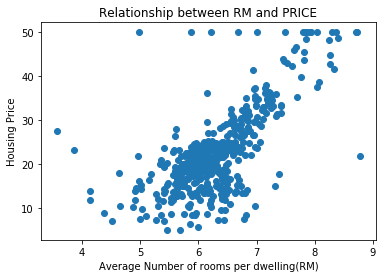

In [18]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and PRICE")
plt.show()

In [19]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

In [20]:
from sklearn.metrics import r2_score
r2_score(bos.PRICE, lm.predict(X))

0.7406077428649428

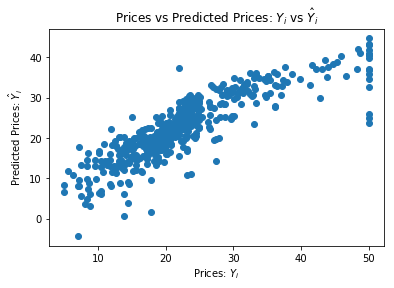

In [21]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

#### There is some error in the predctions as the housing prices increases

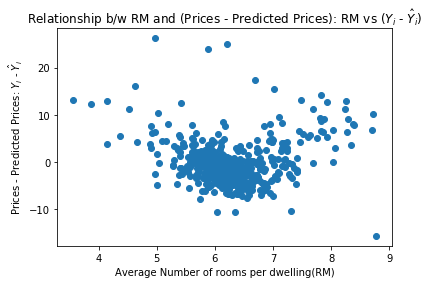

In [22]:
plt.scatter(bos.RM, bos.PRICE - lm.predict(X))
plt.xlabel("Average Number of rooms per dwelling(RM)")
plt.ylabel("Prices - Predicted Prices: $Y_i$ - $\hat{Y}_i$")
plt.title("Relationship b/w RM and (Prices - Predicted Prices): RM vs ($Y_i$ - $\hat{Y}_i$)")
plt.show()

Here we can see the error graph is hetroscadastically distributed and 
has no pattern in it, hence the model used is correct and captures all information
and shows no interactions between the variables chosen.

#### Since we cannot implement linear regression on the entire dataset, we need to split the dataset into training and test data sets

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
Y = bos['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state =5)

In [25]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [27]:
from sklearn.metrics import r2_score

In [28]:
print(r2_score(Y_train, pred_train))
print(r2_score(Y_test, pred_test))

0.755133274178
0.695538800551


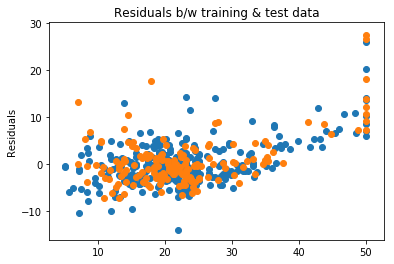

In [29]:
plt.scatter(Y_train, Y_train - pred_train)
plt.scatter(Y_test, Y_test - pred_test)
plt.ylabel("Residuals")
plt.title("Residuals b/w training & test data")
plt.show()

#### Conclusion :

1. I explored the boston data and renamed the columns.
2. I used the linear regression model to fit the entire data set
    and predicted the housing prices.
3. Calculated the accuracy b/w actual housing price and the predicted price.
4. Created the dataframe using features and their coefficients and 
    correaltion b/w RM and Price and predicted the graph displaying
    Relationship b/w RM and (Prices - Predicted Prices) which was 
    hetroscadastic in nature and shows no patterns.
5. I made a train-test split and calculated train & test predictions
    and their accuracy scores with the actuals using r2_score.
6. I plotted residuals graph of training & test datasets.